In [1]:
%matplotlib inline
import torch
import torchvision 
from torch.utils import data
from torchvision import transforms
from d2l import torch as d2l
d2l.use_svg_display()

In [2]:
trans = transforms.ToTensor()
mnist_train = torchvision.datasets.FashionMNIST(root="./data",train=True,transform=trans,download=False)
mnist_test = torchvision.datasets.FashionMNIST(root="./data",train=False,transform=trans,download=True)
len(mnist_train),len(mnist_test)

(60000, 10000)

In [3]:
mnist_train[0][0].shape

torch.Size([1, 28, 28])

In [4]:
def get_fashion_mnist_labels(labels):
    text_labels = [
        't-shirt','trouser','pullover','dress','coat','sandal','sneaker','bag','ankle boot'
    ]
    return [text_labels[int(i)] for i in labels]
def show_images(imgs,num_rows,num_cols,titles=None,scale=1.5):
    figsize = (num_cols * scale,num_rows * scale)
    _,axes = d2l.plt.subplots(num_rows,num_cols,figsize=figsize)
    axes = axes.flatten()
    for i, (ax,img) in enumerate(zip(axes,imgs)):
        if torch.is_tensor(img):
            ax.imshow(img.numpy())
        else:
            ax.imshow(img)
    

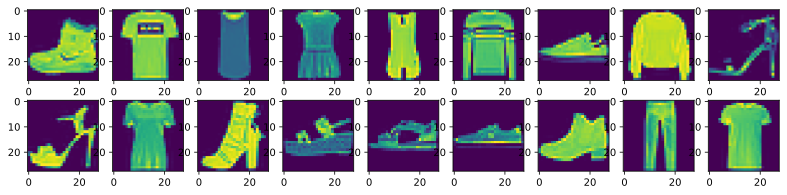

In [5]:
X,y = next(iter(data.DataLoader(mnist_train,batch_size=18)))
show_images(X.reshape(18,28,28),2,9,titles=get_fashion_mnist_labels)

In [6]:
batch_size = 256
def get_dataloader_workers():
    return 4
train_iter = data.DataLoader(mnist_train,batch_size,shuffle=True,num_workers=get_dataloader_workers())
timer = d2l.Timer()
for X,y in train_iter:
    continue
f'{timer.stop():.2f} sec'

'0.34 sec'

In [7]:
import random
import torch
from d2l import torch as d2l
def synthetic_data(w,b,num_examples):
    X = torch.normal(0,1,(num_examples,len(w)))
    y = torch.matmul(X,w) + b 
    y +=torch.normal(0,0.01,y.shape)
    return X,y.reshape((-1,1))
true_w = torch.tensor([2,-3.4])
true_b = 4.2
features,labels = synthetic_data(true_w,true_b,1000)

In [8]:
print("features",features[0],"\n labels:",labels[0])

features tensor([-0.3475, -0.2454]) 
 labels: tensor([4.3133])


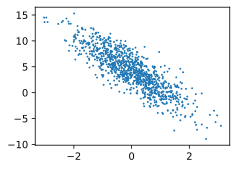

In [9]:
d2l.set_figsize()
d2l.plt.scatter(features[:,1].detach().numpy(),
               labels.detach().numpy(),1)

In [10]:
def data_iter(batch_size,features,labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0,num_examples,batch_size):
        batch_indices = torch.tensor(
        indices[i:min(i + batch_size,num_examples)])
        yield features[batch_indices],labels[batch_indices]
batch_size = 10
for X,y in data_iter(batch_size,features,labels):
    print(X,'\n',y)
    break

tensor([[-1.0436, -1.8863],
        [ 0.7861, -0.4141],
        [ 2.3464, -0.7331],
        [ 2.0421, -0.1925],
        [ 1.6310, -0.0440],
        [-0.5890,  1.0568],
        [ 0.5823, -0.2006],
        [-1.2744,  0.4719],
        [ 1.2213, -0.3269],
        [-1.6016,  0.5951]]) 
 tensor([[ 8.5105],
        [ 7.1763],
        [11.3999],
        [ 8.9372],
        [ 7.6076],
        [-0.5597],
        [ 6.0455],
        [ 0.0473],
        [ 7.7593],
        [-1.0293]])


In [11]:
w = torch.normal(0,0.1,size=(2,1),requires_grad=True)
b = torch.zeros(1,requires_grad=True)

In [12]:
def linreg(X,w,b):
    return torch.matmul(X,w) + b

In [13]:
def squared_loss(y_hat,y):
    return (y_hat-y.reshape(y_hat.shape))**2 /2

In [14]:
def sgd(params,lr,batch_size):
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

In [15]:
lr = 10.0
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X,y in data_iter(batch_size,features,labels):
        l = loss(net(X,w,b),y)
        l.sum().backward()
        sgd([w,b],lr,batch_size)
    with torch.no_grad():
        train_l = loss(net(features,w,b),labels)
        print(f'epoch {epoch + 1}, loss {train_l.mean():f}')

epoch 1, loss nan
epoch 2, loss nan
epoch 3, loss nan


In [16]:
print(f'w的估计误差: {true_w-w.reshape(true_w.shape)}')
print(f'b的估计误差：{true_b-b}')

w的估计误差: tensor([nan, nan], grad_fn=<SubBackward0>)
b的估计误差：tensor([nan], grad_fn=<RsubBackward1>)
